In [2]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# task 1

In [6]:
img = cv2.imread('../assets/images/cameraman.tif', 0)

In [7]:
# robert
gx = np.array([[1, 0],[0, -1]])
gy = gx.T

In [8]:
GX = cv2.filter2D(img, -1, gx)
GY = cv2.filter2D(img, -1, gy)
G = np.sqrt(GX**2+GY**2)
A = np.arctan2(GY,GX)

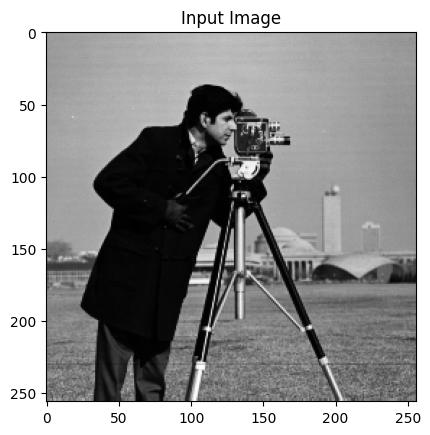

In [9]:
plt.plot(1)
plt.title("Input Image")
plt.imshow(img, cmap='gray')

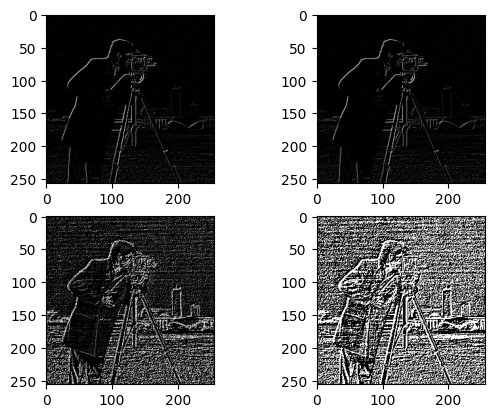

In [10]:
plt.subplot(2, 2, 1)
plt.imshow(GX, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(GY, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(G, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(A, cmap='gray')

In [11]:
# Prewitt
gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
gy = gy.T
GX = cv2.filter2D(img, -1, gx)
GY = cv2.filter2D(img, -1, gy)
G = np.sqrt(np.square(GX) + np.square(GY))
A = np.arctan2(GY,GX)

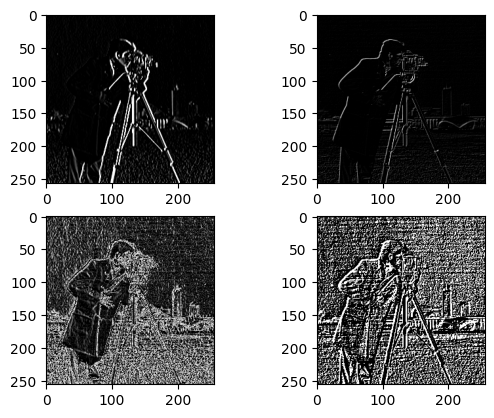

In [12]:
plt.subplot(2, 2, 1)
plt.imshow(GX, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(GY, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(G, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(A, cmap='gray')

In [13]:
# Sobel
gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
gy = gx.T
GX = cv2.filter2D(img, -1, gx)
GY = cv2.filter2D(img, -1, gy)
G = np.sqrt(np.square(GX) + np.square(GY))
A = np.arctan2(GY,GX)

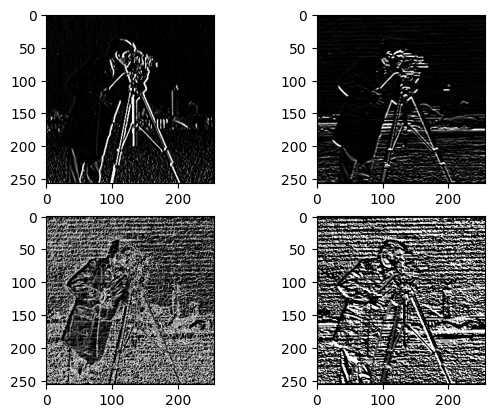

In [14]:
plt.subplot(2, 2, 1)
plt.imshow(GX, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(GY, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(G, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(A, cmap='gray')

# task2

In [15]:
img = cv2.imread('../assets/images/casablanca.tif')

In [16]:
# Kirsch Compass masks
m1 = np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]])
m2 = np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]])
m3 = np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]])
m6 = np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]])
m9 = np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]])
m8 = np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]])
m7 = np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]])
m4 = np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]])
kirsch = {1:m1, 2:m2, 3:m3, 4:m4, 6:m6, 7:m7, 8:m8, 9:m9}

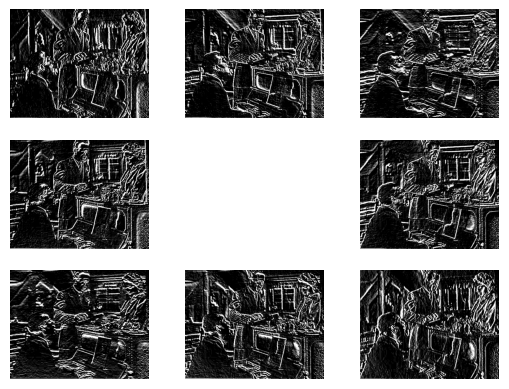

In [17]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.axis('off')
    if i==5:
        plt.plot()
        continue
    plt.imshow(cv2.filter2D(img, -1, kirsch[i]), cmap='gray')


# task4

In [18]:
img = cv2.imread('../assets/images/cameraman.tif', 0)

In [19]:
M, N = img.shape
g_noise = cv2.randn(np.zeros((M, N)).astype(np.uint8), 0, 100)

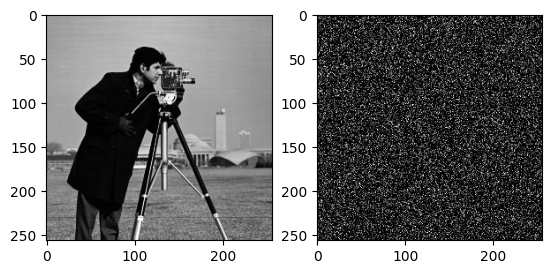

In [20]:
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(g_noise, cmap='gray')

In [21]:
img_noise = cv2.add(img, g_noise)

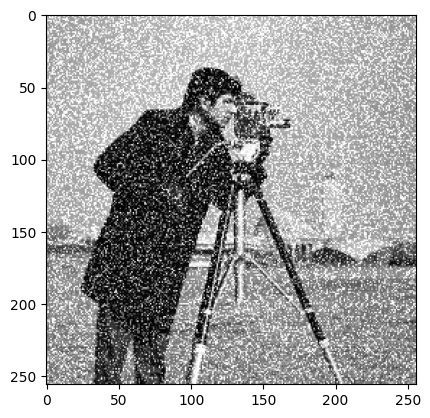

In [22]:
plt.imshow(img_noise, cmap='gray')

In [23]:
from scipy import ndimage

In [24]:
res = ndimage.gaussian_laplace(img_noise, sigma=2)

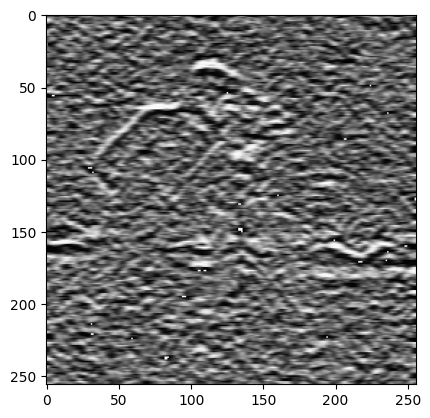

In [40]:
plt.imshow(res, cmap='gray')

In [74]:
def LoG(sigma, x, y):
    laplace = -1/(np.pi*sigma**4)*(1-(x**2+y**2)/(2*sigma**2))*np.exp(-(x**2+y**2)/(2*sigma**2))
    return laplace

def LoG_discrete(sigma, n):
    l = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            l[i,j] = LoG(sigma, (i-(n-1)/2),(j-(n-1)/2))
    return l

def center(x):
    return (x/LoG(sigma,0,0))

sigma = 0.5
LoG1 = np.round(LoG_discrete(sigma, 3))
LoG2 = np.round(LoG_discrete(sigma, 5))
LoG3 = np.round(LoG_discrete(sigma, 7))
LoG4 = np.round(LoG_discrete(sigma, 9))

In [75]:
LoG1

array([[ 0.,  1.,  0.],
       [ 1., -5.,  1.],
       [ 0.,  1.,  0.]])

In [76]:
img = cv2.filter2D(img_noise, -1, LoG1)

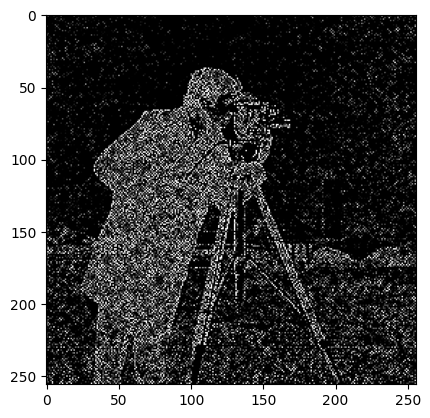

In [77]:
plt.imshow(img, cmap='gray')

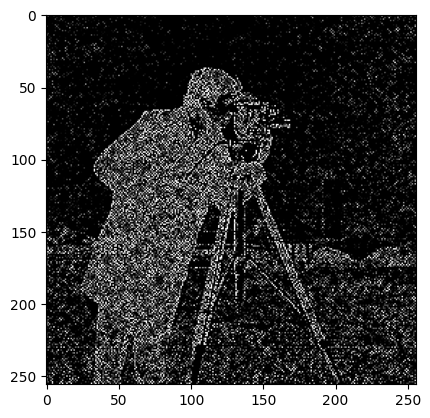

In [78]:
img = cv2.filter2D(img_noise, -1, LoG2)
plt.imshow(img, cmap='gray')

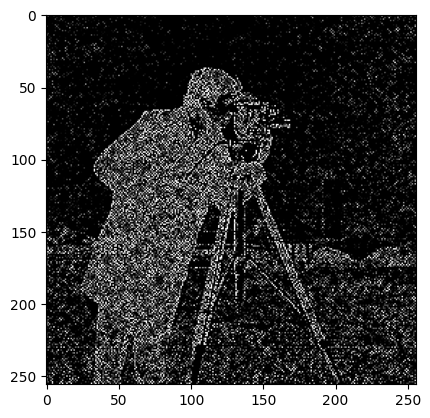

In [79]:
img = cv2.filter2D(img_noise, -1, LoG3)
plt.imshow(img, cmap='gray')

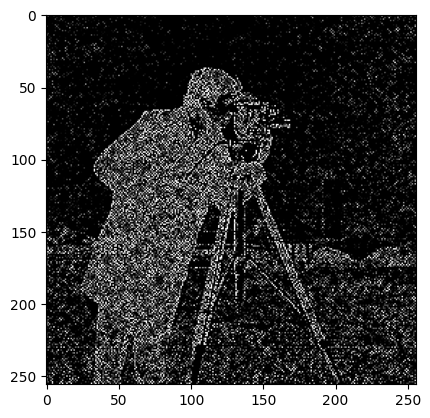

In [80]:
img = cv2.filter2D(img_noise, -1, LoG4)
plt.imshow(img, cmap='gray')

# task3

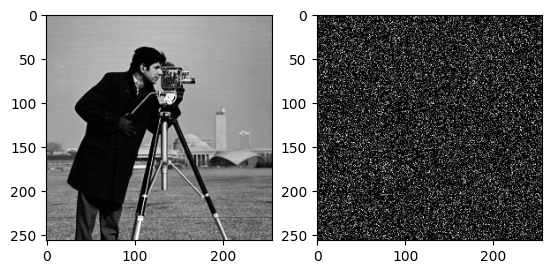

In [121]:
# Canny edge detection algorithm
img = cv2.imread('../assets/images/cameraman.tif', 0)
M, N = img.shape
g_noise = cv2.randn(np.zeros((M, N)).astype(np.uint8), 0, 100)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(g_noise, cmap='gray')

In [122]:
# img_noise = cv2.add(img, g_noise)
# plt.imshow(img_noise, cmap='gray')

In [123]:
def gaussian_fn(sigma, x, y):
    return (1/(2*np.pi*sigma**2))*np.exp(-(x**2+y**2)/(2*sigma**2))

def discrete_gaussian_kernel(sigma, n):
    l = np.zeros([n, n])

    for i in range(n):
        for j in range(n):
            l[i][j] = gaussian_fn(sigma, (i-(n-1)/2),(j-(n-1)/2))

    return l

sigma = 1
G1 = discrete_gaussian_kernel(1, 7)

In [124]:
gfiltered_img = cv2.filter2D(img, -1, G1)

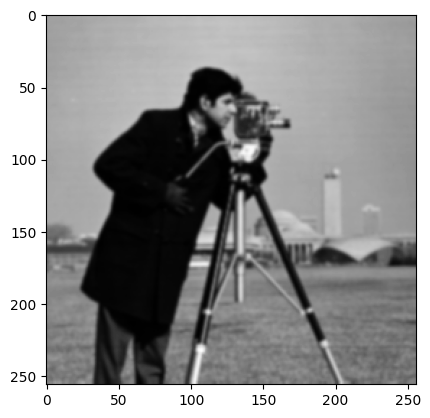

In [125]:
plt.imshow(gfiltered_img, cmap='gray')

In [126]:
# Sobel
gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
gy = gx.T
GX = cv2.filter2D(gfiltered_img, -1, gx)
GY = cv2.filter2D(gfiltered_img, -1, gy)
G = np.sqrt(np.square(GX) + np.square(GY))
A = np.arctan2(GY,GX)

In [138]:
# plt.imshow(G, cmap='gray')

In [139]:
def non_maximum_suppression(gradient_magnitude, gradient_angle):
    M, N = gradient_magnitude.shape
    Z = np.zeros((M, N), dtype=np.int32)
    angle = gradient_angle * 180.0 / np.pi  # Convert to degrees
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            try:
                q = 255
                r = 255

                # Angle 0
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = gradient_magnitude[i, j+1]
                    r = gradient_magnitude[i, j-1]
                # Angle 45
                elif 22.5 <= angle[i, j] < 67.5:
                    q = gradient_magnitude[i+1, j-1]
                    r = gradient_magnitude[i-1, j+1]
                # Angle 90
                elif 67.5 <= angle[i, j] < 112.5:
                    q = gradient_magnitude[i+1, j]
                    r = gradient_magnitude[i-1, j]
                # Angle 135
                elif 112.5 <= angle[i, j] < 157.5:
                    q = gradient_magnitude[i-1, j-1]
                    r = gradient_magnitude[i+1, j+1]

                if (gradient_magnitude[i, j] >= q) and (gradient_magnitude[i, j] >= r):
                    Z[i, j] = gradient_magnitude[i, j]
                else:
                    Z[i, j] = 0

            except IndexError as e:
                pass

    return Z

In [140]:
nmx_img = non_maximum_suppression(G, A)

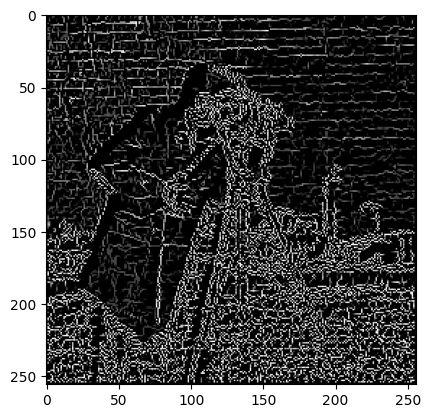

In [141]:
plt.imshow(nmx_img, cmap='gray')

In [150]:
def hysteresis_thold(img, low_threshold, high_threshold):
    M, N = img.shape
    edges = np.zeros((M, N), dtype=np.int32)

    strong = 255
    weak = 25

    # Identify the strong and weak edges
    strong_i, strong_j = np.where(img >= high_threshold)
    weak_i, weak_j = np.where((img >= low_threshold) & (img < high_threshold))

    edges[strong_i, strong_j] = strong
    edges[weak_i, weak_j] = weak

    for i in range(1, M-1):
        for j in range(1, N-1):
            if (edges[i, j] == weak):
                if ((edges[i+1, j-1:j+2] == strong).any() or
                    (edges[i-1, j-1:j+2] == strong).any() or
                    (edges[i, [j-1, j+1]] == strong).any()):
                    edges[i, j] = strong  # Convert weak edge to strong edge
                else:
                    edges[i, j] = 0  # Suppress weak edge

    return edges

In [151]:
canny_edges = hysteresis_thold(nmx_img, 50, 150)

In [152]:
print(canny_edges)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


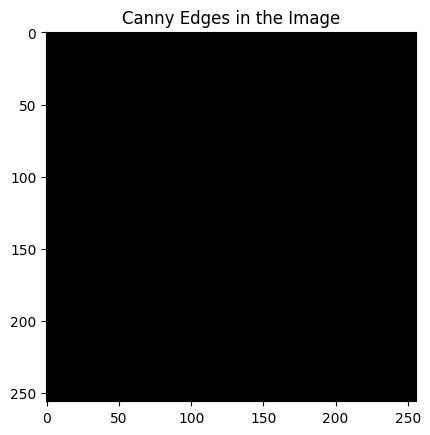

In [153]:
plt.title('Canny Edges in the Image')
plt.imshow(canny_edges, cmap='gray')

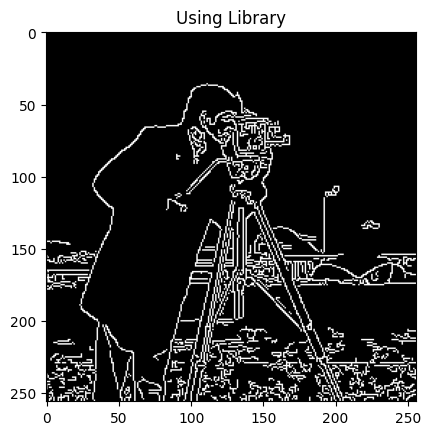

In [120]:
plt.title('Using Library')
plt.imshow(cv2.Canny(img, 100, 200), cmap='gray')

# task5

In [169]:
img = cv2.imread('../assets/images/cameraman.tif', 0)

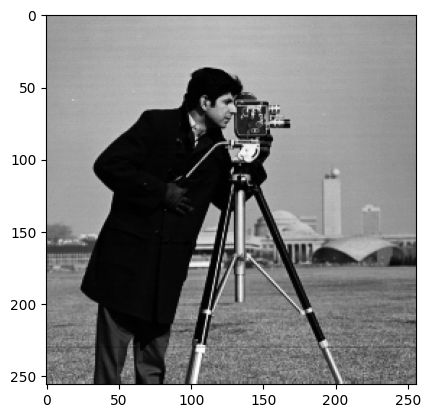

In [170]:
plt.imshow(img, cmap='gray')

In [171]:
m, n = img.shape

In [172]:
M = 8
N = 8

In [173]:
tiles = [img[x:x+M,y:y+N] for x in range(0,img.shape[0],M) for y in range(0,img.shape[1],N)]

In [174]:
LPF = discrete_gaussian_kernel(1, 3)

In [175]:
lpfd_img = cv2.filter2D(img, -1, LPF)

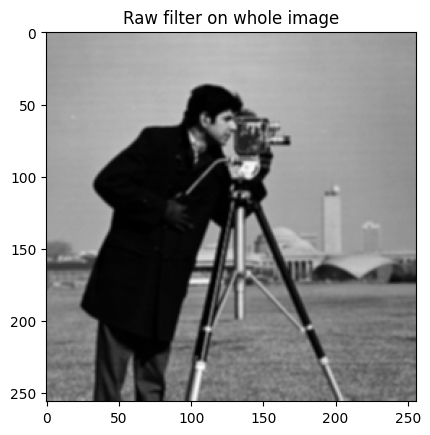

In [176]:
plt.title('Raw filter on whole image')
plt.imshow(lpfd_img, cmap='gray')

In [177]:
for i, elt in enumerate(tiles):
    tiles[i] = cv2.filter2D(elt, -1, LPF)    

In [178]:
new_img = np.zeros([m, n])

In [180]:
i = 0
for x in range(0,new_img.shape[0],M):
    for y in range(0,img.shape[1],N):
        # print(new_img[x:x+M, y:y+N].shape, tiles[i].shape)
        new_img[x:x+M, y:y+N] = tiles[i]
        i += 1

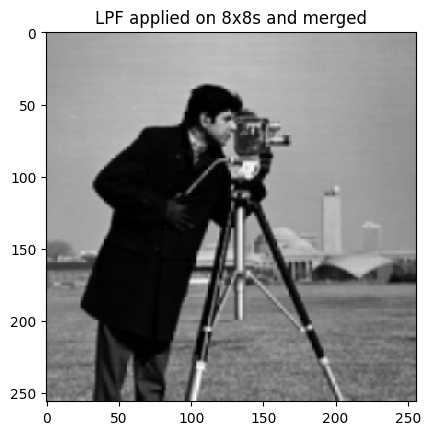

In [181]:
plt.title('LPF applied on 8x8s and merged')
plt.imshow(new_img, cmap='gray')